# **SpaceX  Falcon 9 first stage Landing Prediction**


#### Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


#### Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


In [118]:
import requests
import numpy as np
import pandas as pd
import datetime
from pandas import json_normalize
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### Takes the dataset and uses the rocket column to call the API and append the data to the list

From the <code>rocket</code> column we would like to learn the booster name.


In [119]:
def getBoosterVersion(data):
    BoosterVersion = []  
    
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/" + str(x)).json()
            BoosterVersion.append(response['name'])
    return BoosterVersion

#### Takes the dataset and uses the launchpad column to call the API and append the data to the list


From the <code>launchpad</code> we would like to know the name of the launch site being used, the logitude, and the latitude.


In [120]:
def getLaunchSite(data):
    Longitude = []
    Latitude = []
    LaunchSite = []

    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/" + str(x)).json()

            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

    return Longitude, Latitude, LaunchSite

#### Takes the dataset and uses the payloads column to call the API and append the data to the lists

From the <code>payload</code> we would like to learn the mass of the payload and the orbit that it is going to.


In [121]:
def getPayloadData(data):
    PayloadMass = []
    Orbit = []

    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/" + load).json()

            PayloadMass.append(response.get('mass_kg'))
            Orbit.append(response.get('orbit'))

    return PayloadMass, Orbit


#### Takes the dataset and uses the cores column to call the API and append the data to the lists


In [122]:
def getCoreData(data):
    Block = []
    ReusedCount = []
    Serial = []
    Outcome = []
    Flights = []
    GridFins = []
    Reused = []
    Legs = []
    LandingPad = []

    for core in data['cores']:
        if core['core'] is not None:
            response = requests.get(f"https://api.spacexdata.com/v4/cores/{core['core']}").json()

            Block.append(response.get('block'))
            ReusedCount.append(response.get('reuse_count'))
            Serial.append(response.get('serial'))
        else:
            Block.append(None)
            ReusedCount.append(None)
            Serial.append(None)

        Outcome.append(f"{core.get('landing_success')} {core.get('landing_type')}")
        Flights.append(core.get('flight'))
        GridFins.append(core.get('gridfins'))
        Reused.append(core.get('reused'))
        Legs.append(core.get('legs'))
        LandingPad.append(core.get('landpad'))

    return (Block, ReusedCount, Serial, Outcome, Flights, GridFins, Reused, Legs, LandingPad)


#### Now let's start requesting rocket launch data from SpaceX API

In [123]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response=requests.get(static_json_url)
response.status_code

200

In [124]:
data = response.json()
df = json_normalize(data)
df.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [125]:
df.columns

Index(['static_fire_date_utc', 'static_fire_date_unix', 'tbd', 'net', 'window',
       'rocket', 'success', 'details', 'crew', 'ships', 'capsules', 'payloads',
       'launchpad', 'auto_update', 'failures', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'id', 'fairings.reused', 'fairings.recovery_attempt',
       'fairings.recovered', 'fairings.ships', 'links.patch.small',
       'links.patch.large', 'links.reddit.campaign', 'links.reddit.launch',
       'links.reddit.media', 'links.reddit.recovery', 'links.flickr.small',
       'links.flickr.original', 'links.presskit', 'links.webcast',
       'links.youtube_id', 'links.article', 'links.wikipedia', 'fairings'],
      dtype='object')

In [126]:
df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

df = df[df['cores'].map(len)==1]
df = df[df['payloads'].map(len)==1]

df['cores'] = df['cores'].map(lambda x : x[0])
df['payloads'] = df['payloads'].map(lambda x : x[0])

df['date'] = pd.to_datetime(df['date_utc']).dt.date

df = df[df['date'] <= datetime.date(2020, 11, 13)]
df.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [127]:
BoosterVersion = getBoosterVersion(df)
PayloadMass, Orbit = getPayloadData(df)
(
    Block,
    ReusedCount,
    Serial,
    Outcome,
    Flights,
    GridFins,
    Reused,
    Legs,
    LandingPad
) = getCoreData(df)
Longitude, Latitude, LaunchSite = getLaunchSite(df)


In [128]:
launch_dict = {
    'FlightNumber': list(df['flight_number']),
    'Date': list(df['date']),
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

df = pd.DataFrame(launch_dict)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [129]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

### Filter the dataframe to only include `Falcon 9` launches


In [130]:
data_falcon9 = df[df['BoosterVersion']!='Falcon 1']
data_falcon9.loc[:, 'FlightNumber'] = list(range(1, data_falcon9.shape[0] + 1))

## Data Wrangling


In [131]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

### Task 3: Dealing with Missing Values


In [132]:
mean_payload = df['PayloadMass'].mean()
df['PayloadMass'] = df['PayloadMass'].replace(np.nan, mean_payload)

mode_pad = df['LandingPad'].mode()[0]
df['LandingPad'] = df['LandingPad'].fillna(mode_pad)

In [133]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

## Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia


In [134]:
import sys
from bs4 import BeautifulSoup 
import re
import unicodedata

#### we will provide some helper functions for you to process web scraped HTML table

In [135]:
def date_time(table_cells):
    return [date_time.strip() for date_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    out =''.join([booster_version for i, booster_version in enumerate( table_cells.strings) if i%2 == 0][0:-1])
    return out

def landing_status(table_cells):
    out = [i for i in table_cells.strings][0]
    return out

def get_mass(table_cells):
    mass = unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find('kg')
        new_mass = mass[0 : mass.find('kg')+2].strip()
    else:
        new_mass = 0
    return new_mass
 
def extract_column_from_header(row):
    for tag in ['br', 'a', 'sup']:
        for match in row.find_all(tag):
            match.decompose()
    column_name = row.get_text(strip=True)
    
    if column_name and not column_name.strip().isdigit():
        return column_name

#### request the HTML page from the above URL and get a `response` object, Print the page title to verify if the `BeautifulSoup` object was created properly 



In [136]:
url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/120.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

print(response.status_code)
print(response.headers.get("Content-Type"))

soup = BeautifulSoup(response.content, "html.parser")

if soup.title:
    print(soup.title.string)
else:
    print("No title found")
    
table = soup.find("table", class_="wikitable")

if table:
    column_names = [th.text.strip() for th in table.find_all("th")]
    print(column_names)
else:
    print("Table not found")

200
text/html; charset=UTF-8
List of Falcon 9 and Falcon Heavy launches - Wikipedia
['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


### Extract all column/variable names from the HTML table header


In [137]:
html_tables = soup.find_all('table')
#html_table

#### Starting from the third table is our target table contains the actual launch records.


In [138]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

#### Next, we just need to iterate through the `<th>` elements and apply the provided `extract_column_from_header()` to extract column name one by one


In [139]:
column_names = []

table_headers = first_launch_table.find_all('th')

for header in table_headers:
    name = extract_column_from_header(header)
    if name is not None and len(name)> 0:
        column_names.append(name.strip())

column_names = list(dict.fromkeys(column_names)) 
column_names = [name.replace('\xa0', ' ') for name in column_names]

column_names

['Flight No.',
 'Date andtime ()',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launchoutcome']

## Create a data frame by parsing the launch HTML tables
#### We will create an empty dictionary with keys from the extracted column names. Later, this dictionary will be converted into a Pandas dataframe


In [140]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date andtime ()']


# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []

# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

#### Next, we just need to fill up the `launch_dict` with launch records extracted from table rows.


In [141]:
extracted_row = 0 
for table_number,table in enumerate(soup.find_all('table','wikitable plainrowheaders collapsible')):
    for rows in table.find_all('tr'):

        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()

        else:
            flag = False

        row = rows.find_all('td')

        if flag:
            extracted_row += 1

            launch_dict['Flight No.'].append(flight_number)
            
            datetimelist = date_time(row[0])
            date = datetimelist[0].strip(',')
            time = datetimelist[1]
            launch_dict['Date'].append(date)
            launch_dict['Time'].append(time)

            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string
            launch_dict['Version Booster'].append(bv)

            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)

            payload = row[3].a.string
            launch_dict['Payload'].append(payload)

            pm = get_mass(row[4])
            launch_dict['Payload mass'].append(pm)
            
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
                
            customer = row[6].text.strip()
            launch_dict['Customer'].append(customer)

            launch_outcome = list(row[7].strings)[0].strip()
            launch_dict['Launch outcome'].append(launch_outcome)

            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            launch_dict.pop('Launchoutcome', None)  


In [142]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,NASA (COTS)\nNRO,Success,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,NASA (COTS),Success,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA (CRS),Success,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA (CRS),Success,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


In [143]:
df.to_csv('spacex_web_scraped.csv', index=False)

 ## Data wrangling 


In [144]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [145]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [146]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [147]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

### Each launch aims to an dedicated orbit, and here are some common orbit types:
* <b>LEO</b>: Low Earth Orbit – ≤ 2,000 km. Most satellites operate here <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbit – < 450 km. High-resolution Earth observation <a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> Geostationary Transfer Orbit – Elliptical path to reach GEO <a  href="https://www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (or SO)</b>: Passes same location at the same solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b>: Earth-Sun Lagrange Point – Gravitational balance point between Earth and Sun  <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6]</a>.


* <b> ISS </b> International Space Station – A modular station in LEO <a href="https://en.wikipedia.org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b>  Medium Earth Orbit – 2,000–35,786 km. Used by GPS satellites <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8] </a>


* <b> HEO </b> Highly Elliptical Orbit – Long dwell time over specific regions <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a>


* <b> GEO </b> Geostationary Orbit – 35,786 km. Appears fixed over Earth <a href="https://en.wikipedia.org/wiki/Geostationary_orbit"> [10] </a>


* <b> PO </b> Satellite passes over both poles for global coverage <a href="https://en.wikipedia.org/wiki/Polar_orbit"> [11] </a>

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)

###  Calculate the number and occurrence of each orbit


In [148]:
df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64

### Calculate the number and occurence of mission outcome of the orbits

In [149]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [150]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### Create a landing outcome label from Outcome column


In [151]:
bad_outcomes = {'None None', 'False Ocean', 'False RTLS', 'False ASDS', 'None ASDS'}
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

In [152]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [153]:
df["Class"].mean()

np.float64(0.6666666666666666)

In [154]:
df.to_csv("dataset_part_2.csv", index=False)

# Exploratory Data Analysis with SQL

### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [155]:
%load_ext sql
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect('my_data1.db')
cur = con.cursor()

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [156]:
%sql sqlite:///my_data1.db
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL",con, if_exists='replace', index=False, method='multi')
df.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [157]:
#DROP THE TABLE IF EXISTS
%sql DROP TABLE IF EXISTS SPACEXTABLE;
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.
 * sqlite:///my_data1.db
Done.


[]

In [158]:
%sql PRAGMA table_info(SPACEXTABLE);


 * sqlite:///my_data1.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Date,TEXT,0,None,0
1,Time (UTC),TEXT,0,None,0
2,Booster_Version,TEXT,0,None,0
3,Launch_Site,TEXT,0,None,0
4,Payload,TEXT,0,None,0
5,PAYLOAD_MASS__KG_,INT,0,None,0
6,Orbit,TEXT,0,None,0
7,Customer,TEXT,0,None,0
8,Mission_Outcome,TEXT,0,None,0
9,Landing_Outcome,TEXT,0,None,0


### Display the names of the unique launch sites  in the space mission


In [159]:
%sql SELECT DISTINCT Launch_Site FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


###  Display 5 records where launch sites begin with the string 'CCA' 


In [160]:
%sql SELECT * FROM SPACEXTABLE WHERE Launch_Site LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Display the total payload mass carried by boosters launched by NASA (CRS)


In [161]:
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS Total_Payload_Mass FROM SPACEXTABLE WHERE Customer = 'NASA (CRS)';


 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


### Display average payload mass carried by booster version F9 v1.1

In [162]:
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS Avg_payload_mass FROM SPACEXTABLE WHERE Booster_Version = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


Avg_payload_mass
2928.4


### List the date when the first succesful landing outcome in ground pad was acheived.

In [163]:
%sql SELECT MIN(Date) AS First_Successful_Ground_Pad_Landing FROM SPACEXTABLE WHERE Landing_Outcome = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


First_Successful_Ground_Pad_Landing
2015-12-22


### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000



In [164]:
%%sql
SELECT Booster_Version
FROM SPACEXTABLE
WHERE Landing_Outcome = 'Success (drone ship)'
  AND PAYLOAD_MASS__KG_ > 4000
  AND PAYLOAD_MASS__KG_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### List the total number of successful and failure mission outcomes

In [165]:
%%sql
SELECT Mission_Outcome, COUNT(*) AS Total_Count
FROM SPACEXTABLE
GROUP BY Mission_Outcome;

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


### List all the booster_versions that have carried the maximum payload mass, using a subquery with a suitable aggregate function.


In [166]:
%%sql
SELECT Booster_Version, PAYLOAD_MASS__KG_
FROM SPACEXTABLE
WHERE PAYLOAD_MASS__KG_ = (
    SELECT MAX(PAYLOAD_MASS__KG_)
    FROM SPACEXTABLE
);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [167]:
%%sql
SELECT 
    substr(Date, 6, 2) AS Month,
    Booster_Version,
    Launch_Site,
    Landing_Outcome
FROM SPACEXTABLE
WHERE 
    Landing_Outcome LIKE '%Failure (drone ship)%'
    AND substr(Date, 1, 4) = '2015';

 * sqlite:///my_data1.db
Done.


Month,Booster_Version,Launch_Site,Landing_Outcome
01,F9 v1.1 B1012,CCAFS LC-40,Failure (drone ship)
04,F9 v1.1 B1015,CCAFS LC-40,Failure (drone ship)


### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [168]:
%%sql
SELECT Landing_Outcome, COUNT(*) AS Outcome_Count
FROM SPACEXTABLE
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
  AND Landing_Outcome IN ('Failure (drone ship)', 'Success (ground pad)')
GROUP BY Landing_Outcome
ORDER BY Outcome_Count DESC;


 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
Failure (drone ship),5
Success (ground pad),3


# EDA with VISUALIZATION

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [170]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)
df = pd.read_csv(io.StringIO(response.text))
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.


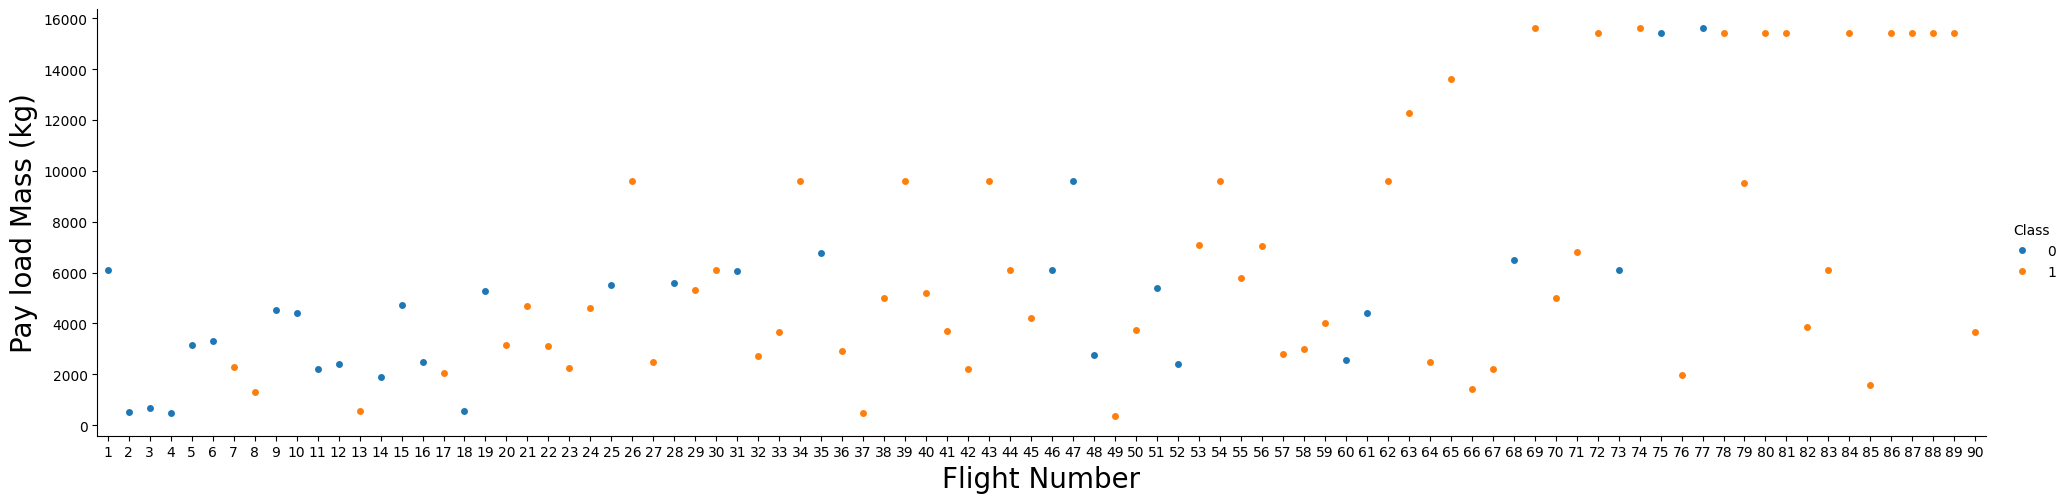

In [171]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Visualize the relationship between Flight Number and Launch Site

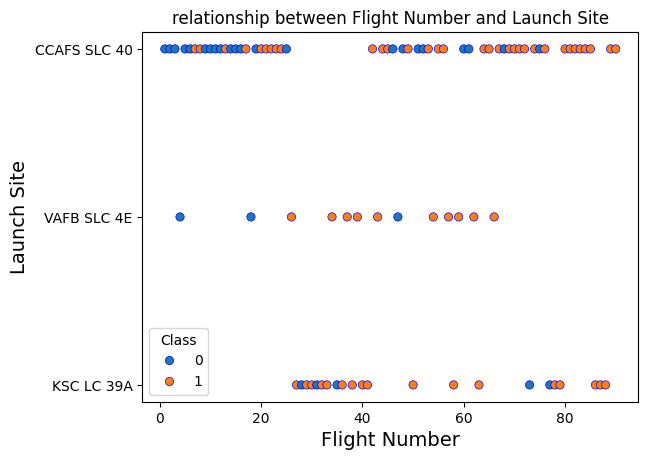

In [172]:
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df,ec='b')
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("relationship between Flight Number and Launch Site")
#plt.grid(True)
plt.show()

## Visualize the relationship between Payload Mass and Launch Site


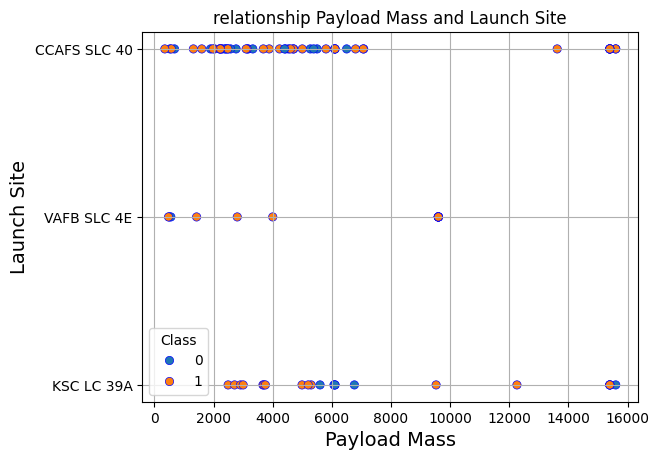

In [173]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df,ec='b')
plt.xlabel("Payload Mass", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("relationship Payload Mass and Launch Site")
plt.grid(True)
plt.show()

## Visualize the relationship between success rate of each orbit type

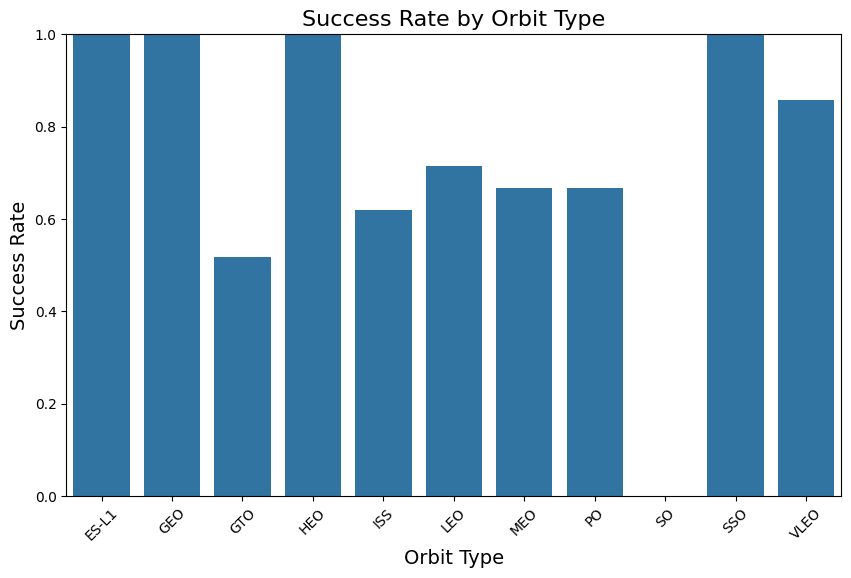

In [174]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rate.rename(columns={'Class': 'SuccessRate'}, inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate)
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


## Visualize the relationship between FlightNumber and Orbit type

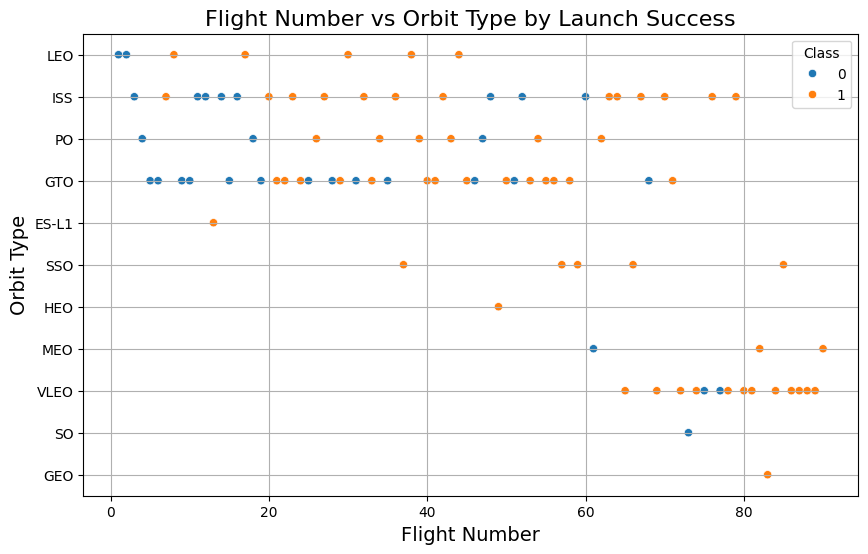

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type by Launch Success", fontsize=16)
plt.grid(True)
plt.show()

## Visualize the relationship between Payload Mass and Orbit type


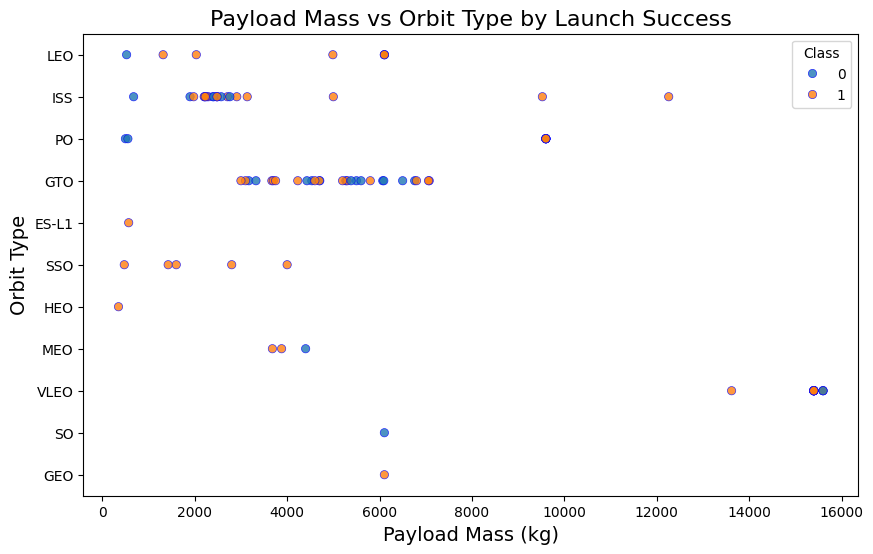

In [176]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, ec='b', alpha = 0.8)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type by Launch Success", fontsize=16)
plt.show()

## Visualize the launch success yearly trend
#### You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

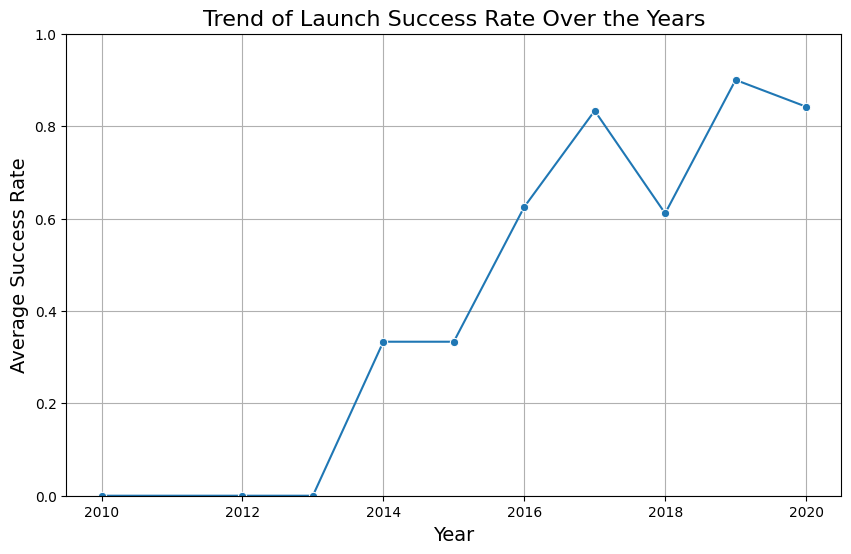

In [177]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index() 

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Trend of Launch Success Rate Over the Years", fontsize=16)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Features Engineering
## Create dummy variables to categorical columns


In [178]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [179]:
features_one_hot = pd.get_dummies(features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Cast all numeric columns to `float64`


In [180]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [181]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)